# ASUNCIONES

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
# Gráficos
# ==============================================================================
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Asunciones y Preprocesamiento
# ==============================================================================
from scipy import stats
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools
# ANOVA
# ==============================================================================
import statsmodels.api as sm
from statsmodels.formula.api import ols
#Linear Regresion con Sklearn
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df = pd.read_pickle("datos/bikes_clean_pickle.pkl")
df.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual,registered
0,2018-01-01,winter,0,1,holiday,Monday,weekend or holiday,cloudy,14.110847,80.5833,10.749882,331,654
1,2018-01-02,winter,0,1,not holiday,Tuesday,workingday,cloudy,14.902598,69.6087,16.652113,131,670
2,2018-01-03,winter,0,1,not holiday,Wednesday,workingday,clear,8.050924,43.7273,16.636703,120,1229
3,2018-01-04,winter,0,1,not holiday,Thursday,workingday,clear,8.200000,59.0435,10.739832,108,1454
4,2018-01-05,winter,0,1,not holiday,Friday,workingday,clear,9.305237,43.6957,12.522300,82,1518


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   year        730 non-null    category      
 3   month       730 non-null    category      
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weather     730 non-null    object        
 8   temp        730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  casual      730 non-null    int64         
 12  registered  730 non-null    int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 70.0+ KB


## Comprobación de la normalidad

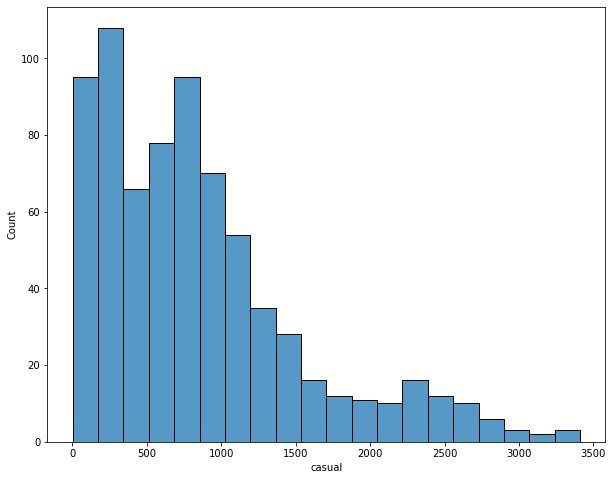

In [4]:
sns.histplot(x = df["casual"],  bins=20);

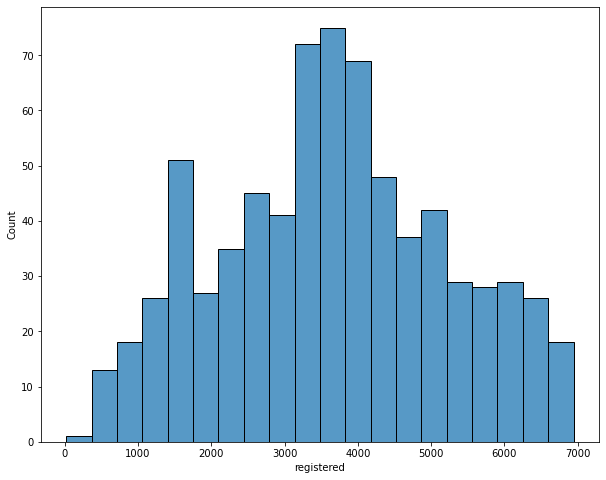

In [5]:
sns.histplot(x = df["registered"],  bins=20);

In [6]:
stats.shapiro(df["casual"])

ShapiroResult(statistic=0.8850967288017273, pvalue=7.660028716313278e-23)

In [7]:
stats.shapiro(df["registered"])

ShapiroResult(statistic=0.98438560962677, pvalue=5.023745757171127e-07)

- Aunque la de 'registered' pudiera parecerlo en la exploración gráfica, ninguna de las dos variables respuesta no son normales (p-value < 0.05).

## Normalización

### Variable "casual"

In [8]:
# dada la larga cola a la derecha probamos la transformación logarítmica
df["casual_LOG"] = df["casual"].apply(lambda x: np.log(x) if x > 0 else 0)

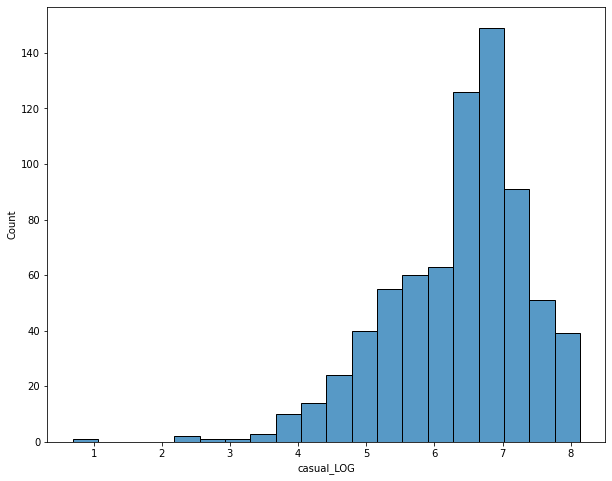

In [9]:
sns.histplot(x = df["casual_LOG"],  bins=20);

In [10]:
stats.shapiro(df["casual_LOG"])

ShapiroResult(statistic=0.9472163915634155, pvalue=1.8073885266976222e-15)

In [11]:
# dado que la anterior no funciona vamos directamente a la única que creemos puede funcionar
df['casual_BOX'], lambda_ajustada = stats.boxcox(df['casual'])

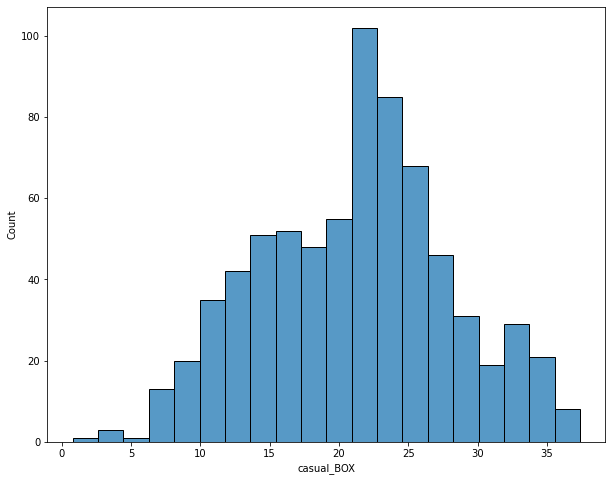

In [12]:
sns.histplot(x = df["casual_BOX"],  bins=20);

In [13]:
stats.shapiro(df["casual_BOX"])

ShapiroResult(statistic=0.9915913939476013, pvalue=0.000365116517059505)

- No ha sido posible normalizar la variable 'casual' (p-value < 0.05).

### Variable "registered"

In [14]:
df["registered_LOG"] = df["registered"].apply(lambda x: np.log(x) if x > 0 else 0)

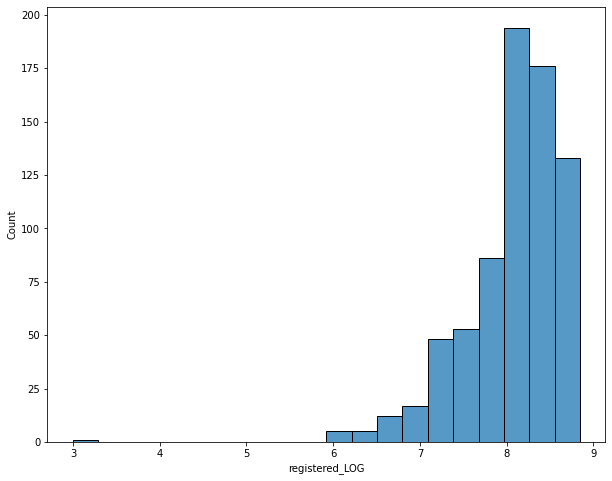

In [15]:
sns.histplot(x = df["registered_LOG"],  bins=20);

In [16]:
df['registered_BOX'], lambda_ajustada = stats.boxcox(df['registered'])

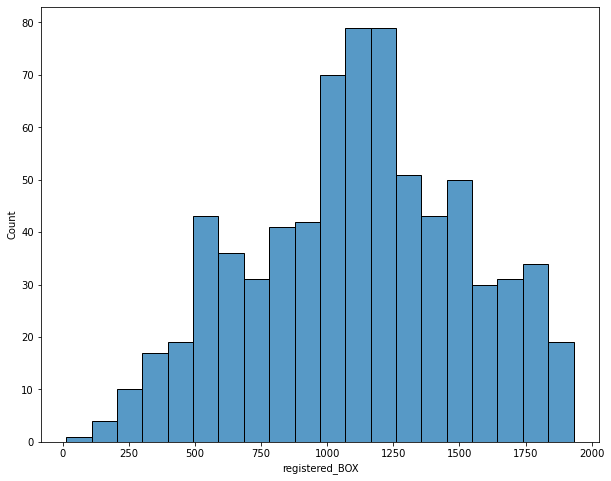

In [17]:
sns.histplot(x = df["registered_BOX"],  bins=20);

In [18]:
stats.shapiro(df["registered_BOX"])

ShapiroResult(statistic=0.9854231476783752, pvalue=1.1639369859040016e-06)

- No ha sido posible normalizar la variable 'registered' (p-value < 0.05).

Ponemos fin a la comprobación de las asunciones debido a que las variables respuestas ni son normales ni se pueden normalizar.